<h1 align="center"><strong>Transformada de Gabor</strong></h1>

**1.¿Qué es un filtro de Gabor?**

El filtro Gabor, que lleva el nombre del físico e ingeniero eléctrico Dennis Gabor, es un filtro lineal que se utiliza para la detección de bordes en el procesamiento de imágenes.

Un filtro de Gabor es un producto de la envolvente gaussiana y el portador sinusoidal (complejo).

**2.¿Para que sirve un filtro de Gabor?**

Los filtros Gabor son buenos detectores de funciones, cada filtro es sensible a los bordes con orientaciones específicas en ubicaciones específicas; sin embargo, existe una compensación entre la resolución espacial y la resolución de frecuencia ("Principio de incertidumbre"), que consiste en si tiene una resolución espacial alta (sepa dónde se produce el borde), tiene menos certeza en el contenido de la frecuencia.

En aplicaciones prácticas, el filtro Gabor puede extraer características relevantes en diferentes escalas y direcciones en el dominio de la frecuencia.

# Funciones base

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import cos,sin,sqrt,pi
import pywt
from fractions import Fraction
from scipy.signal import convolve2d
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap05_Mejoramiento_Frecuencia\imagenes")

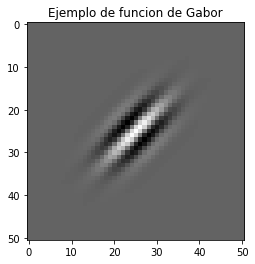

In [2]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
    
    gabor = gauss * sinusoid
    
    return gabor
        
g = genGabor((50,50), 1, np.pi/4, func=np.cos) 

plt.figure(1,figsize=(4,4))
plt.title("Ejemplo de funcion de Gabor")
plt.imshow(g, cmap='gray')
plt.show()

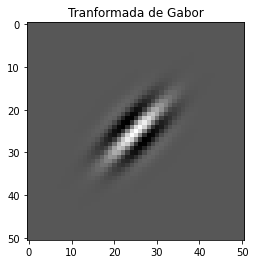

In [3]:
# Usando OpenCV
kernel = cv2.getGaborKernel(ksize = (50,50),sigma = 3,theta = pi/4, lambd = pi/4,gamma = 0.5, psi = 0,ktype = cv2.CV_32F)
plt.figure(1,figsize=(4,4))
plt.title("Tranformada de Gabor")
plt.imshow(kernel,cmap='gray')
plt.show()

Banco de funciones de Gabor para distintos angulos


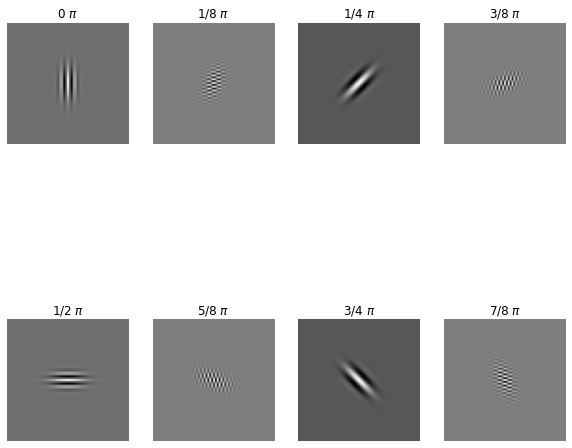

In [4]:
# Generacion de funciones base de Gabor

thetas = np.arange(0, np.pi, np.pi/8) # range of theta
#lambd = np.arange(0.2, 0.6, 0.1) # range of omega
#params = [(t,o) for o in omega for t in theta]


gaborFilterBank = []
gaborParams = []


for theta in thetas:
    gaborParam = {'ksize':(64, 64),'sigma':3,'theta':theta,'lambd':pi/4,'gamma':0.5,'psi':0,'ktype':cv2.CV_32F }
    Gabor = cv2.getGaborKernel(**gaborParam)
    gaborFilterBank.append(Gabor)
    gaborParams.append(gaborParam)

# Plot
print("Banco de funciones de Gabor para distintos angulos")
plt.figure(1,figsize=(10,10))
n = len(gaborFilterBank)
for i in range(n):
    ang= gaborParams[i]['theta'] / np.pi
    a = Fraction(ang)
    plt.subplot(2,n//2, i+1)
    plt.title("{} $\pi$".format(a))
    plt.axis('off')
    plt.imshow(gaborFilterBank[i],cmap='gray')

plt.show()

# Ejemplos

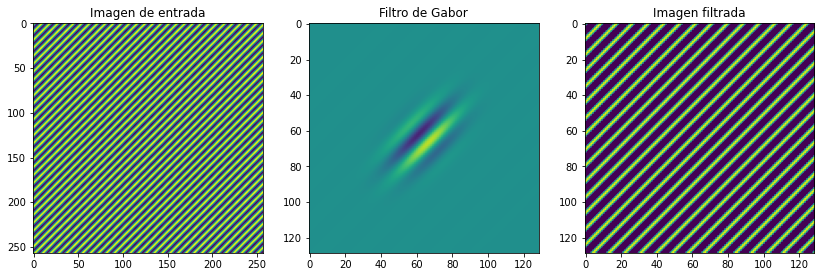

In [5]:
# Ejemplo 1: Imagen sintética

def genSinusoid(sz, A, omega, rho):
    # Generate Sinusoid grating
    # sz: size of generated image (width, height)
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1)) # a BUG is fixed in this line

    stimuli = A * np.cos(omega[0] * x  + omega[1] * y + rho)
    return stimuli

# Figura sintética
theta = np.pi/4 + np.pi
omega = [np.cos(theta), np.sin(theta)]
sinusoidParam = {'A':1, 'omega':omega, 'rho':np.pi/2}

sinusoid = genSinusoid((256,256), **sinusoidParam)

# Filtro de Gabor
alpha = np.pi/4

Gabor = genGabor((129,129), 0.4, alpha, np.sin)

# Respuesta
response = convolve2d(sinusoid, Gabor, mode='valid')

# Plot
plt.figure(1,figsize=(14,14))

plt.subplot(1,3,1)
plt.title("Imagen de entrada")
plt.imshow(sinusoid)

plt.subplot(1,3,2)
plt.title("Filtro de Gabor")
plt.imshow(Gabor, vmin=-0.2, vmax=0.2)

plt.subplot(1,3,3)
plt.title("Imagen filtrada")
plt.imshow(response, vmin=0);

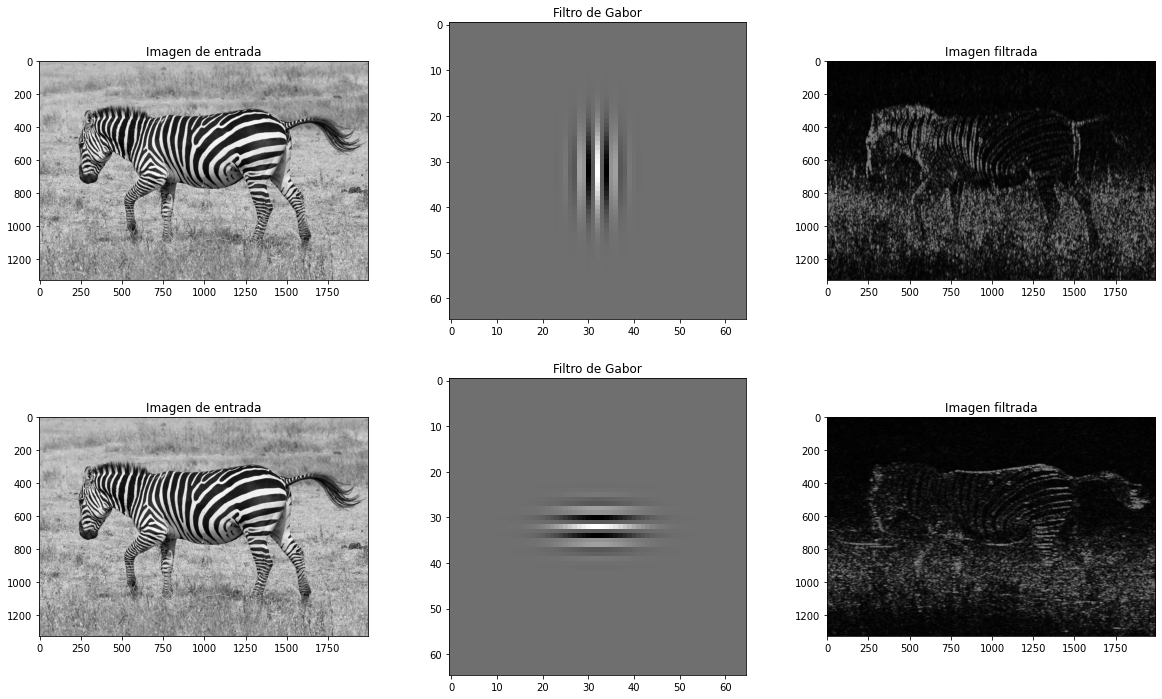

In [6]:
# Ejemplo 2
cebra = cv2.imread("./cebra.jpg",0)

# Filtros de Gabor
GaborFilterV = gaborFilterBank[0]
GaborFilterH =  gaborFilterBank[4]

# Plot
plt.figure(1,figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Imagen de entrada")
plt.imshow(cebra,cmap='gray')

plt.subplot(2,3,2)
plt.title("Filtro de Gabor")
plt.imshow(GaborFilterV,cmap='gray')

plt.subplot(2,3,3)
resV= cv2.filter2D(cebra, cv2.CV_8UC3,GaborFilterV)
plt.title("Imagen filtrada")
plt.imshow(resV,cmap='gray')


plt.subplot(2,3,4)
plt.title("Imagen de entrada")
plt.imshow(cebra,cmap='gray')

plt.subplot(2,3,5)
plt.title("Filtro de Gabor")
plt.imshow(GaborFilterH,cmap='gray')

plt.subplot(2,3,6)
resH= cv2.filter2D(cebra, cv2.CV_8UC3,GaborFilterH)
plt.title("Imagen filtrada")
plt.imshow(resH,cmap='gray')

plt.show()